In [5]:
import numpy as np
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
from time import time
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display

%matplotlib inline

In [6]:
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

def graph_mel_spectogram(wav_file):
    y, sr = librosa.load(wav_file)
    # trim silent edges
    activation, _ = librosa.effects.trim(y)
    n_fft = 2048
    #n_fft = 4096
    hop_length = 512
    #hop_length = 1024
    n_mels = 128
    #n_mels = 256
    S = librosa.feature.melspectrogram(activation, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    #plt.colorbar(format='%+2.0f dB');
    return S_DB

(101, 5998)


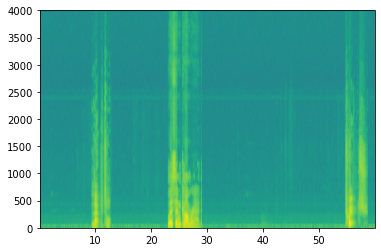

In [7]:
path = "TRAIN/train199.wav"
spec = graph_spectrogram(path)
print(spec.shape)
IPython.display.Audio(path)

/home/biowar/anaconda3/envs/ML/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/biowar/anaconda3/envs/ML/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


(128, 431)

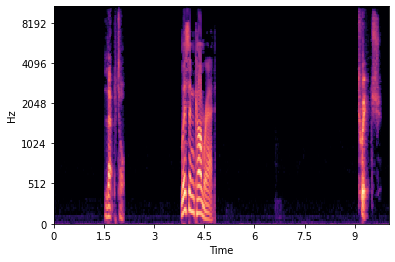

In [8]:
spec2 = graph_mel_spectogram(path)
spec2.shape

(101, 646)


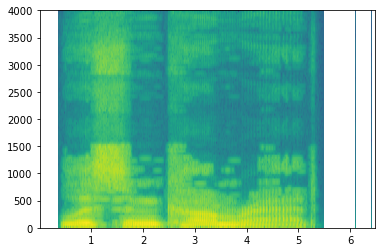

In [99]:
path = "raw_data/COMBINED_ACTIVATIONS/24.wav"
spec = graph_spectrogram(path)
print(spec.shape)
IPython.display.Audio(path)

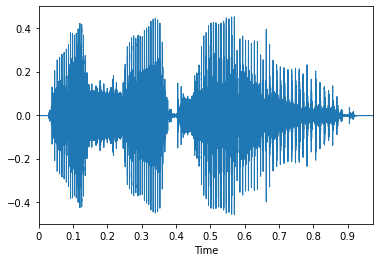

In [27]:
import librosa
import librosa.display

path = "raw_data/COMBINED_ACTIVATIONS/24.wav"
y, sr = librosa.load(path)
# trim silent edges
activation, _ = librosa.effects.trim(y)
librosa.display.waveplot(activation, sr=sr);

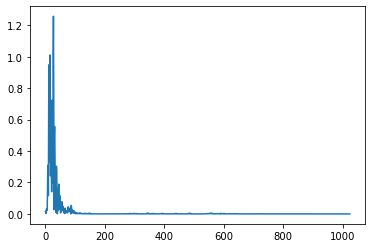

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(activation[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

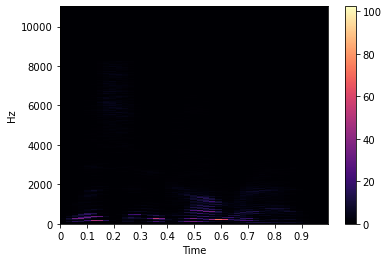

In [30]:
hop_length = 512
D = np.abs(librosa.stft(activation, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

/home/biowar/anaconda3/envs/ML/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/biowar/anaconda3/envs/ML/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/biowar/anaconda3/envs/ML/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


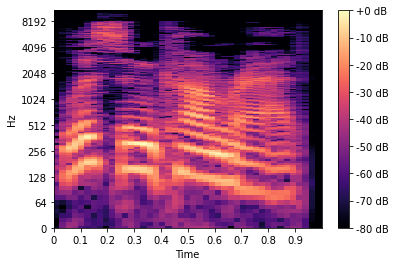

In [31]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

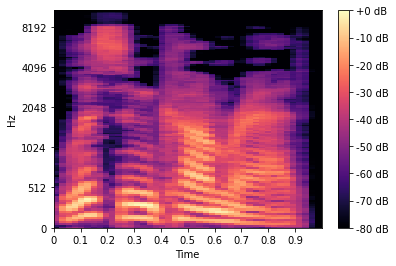

In [34]:
n_mels = 128
S = librosa.feature.melspectrogram(activation, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');